In [3]:
import pandas as pd

# load the bank transaction dataset
df = pd.read_csv('datasets/pos_transactions.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459258 entries, 0 to 459257
Data columns (total 5 columns):
Location           459258 non-null int64
Transaction_Id     459258 non-null int64
Transactin_Date    459258 non-null object
Product_Name       459258 non-null object
Quantity           459258 non-null int64
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   Location  Transaction_Id Transactin_Date    Product_Name  Quantity
0         2           12359      2012-10-23       Candy Bar         1
1         9           12362      2012-10-23   Pain Reliever         1
2         9           12362      2012-10-23   Pain Reliever         1
3         5           12365      2012-10-23      Toothpaste         1
4         2           12371      2012-10-23             Bow         1
5         6           12380      2012-10-23  Greeting Cards         1
6         1           12383      2012-10-23   Pain Reliever         1
7         1           12383      2012-10-23   Pain Reliever        

In [4]:
# group by Transaction_ID, then list all product name
transactions = df.groupby(['Transaction_Id'])['Product_Name'].apply(list)

print(transactions.head(10))

Transaction_Id
12359                                  [Candy Bar]
12362               [Pain Reliever, Pain Reliever]
12365                                 [Toothpaste]
12371                                        [Bow]
12380                             [Greeting Cards]
12383               [Pain Reliever, Pain Reliever]
12386               [Pain Reliever, Pain Reliever]
12392                          [Shampoo, Magazine]
12401    [Candy Bar, Candy Bar, Pencils, Magazine]
12404                                  [Candy Bar]
Name: Product_Name, dtype: object


In [5]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.01))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bow'}), support=0.054645, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bow'}), confidence=0.054645, lift=1.0)]), RelationRecord(items=frozenset({'Candy Bar'}), support=0.171005, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Candy Bar'}), confidence=0.171005, lift=1.0)]), RelationRecord(items=frozenset({'Greeting Cards'}), support=0.146885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Greeting Cards'}), confidence=0.146885, lift=1.0)]), RelationRecord(items=frozenset({'Magazine'}), support=0.241305, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magazine'}), confidence=0.241305, lift=1.0)]), RelationRecord(items=frozenset({'Pain Reliever'}), support=0.0267, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pain Reliever'}), confidence=0.0267, lift=1.0)])]


In [6]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

         Left_side      Right_side   Support  Confidence      Lift
0                              Bow  0.054645    0.054645  1.000000
1                        Candy Bar  0.171005    0.171005  1.000000
2                   Greeting Cards  0.146885    0.146885  1.000000
3                         Magazine  0.241305    0.241305  1.000000
4                    Pain Reliever  0.026700    0.026700  1.000000
5                          Pencils  0.134925    0.134925  1.000000
6                             Pens  0.143575    0.143575  1.000000
7                          Perfume  0.089960    0.089960  1.000000
8                   Photo Processi  0.058480    0.058480  1.000000
9                   Prescription M  0.014505    0.014505  1.000000
10                         Shampoo  0.033800    0.033800  1.000000
11                            Soap  0.043025    0.043025  1.000000
12                      Toothbrush  0.067350    0.067350  1.000000
13                      Toothpaste  0.160425    0.160425  1.00

In [7]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

                    Left_side      Right_side   Support  Confidence      Lift
49                    Perfume      Toothbrush  0.021820    0.242552  3.601370
50                 Toothbrush         Perfume  0.021820    0.323979  3.601370
16                 Toothbrush             Bow  0.011340    0.168374  3.081236
15                        Bow      Toothbrush  0.011340    0.207521  3.081236
52         Magazine,Candy Bar  Greeting Cards  0.016665    0.411126  2.798966
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637


In [8]:
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(10))

                    Left_side      Right_side   Support  Confidence      Lift
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
53    Magazine,Greeting Cards       Candy Bar  0.016665    0.458649  2.682078
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
52         Magazine,Candy Bar  Greeting Cards  0.016665    0.411126  2.798966
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
51   Candy Bar,Greeting Cards        Magazine  0.016665    0.381699  1.581813
59           Magazine,Pencils       Candy Bar  0.012005    0.379545  2.219495
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
67     Pencils,Greeting Cards        Magazine  0.010955    0.374658  1.552633
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069


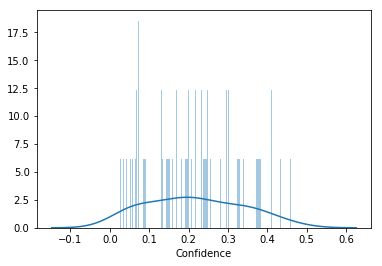

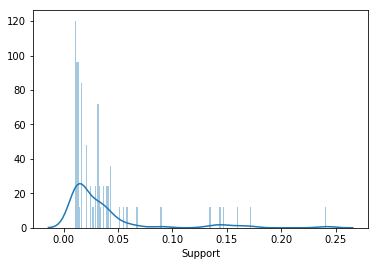

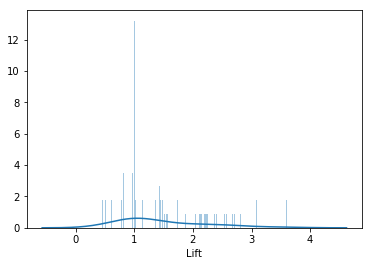

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


conf_dist = sns.distplot(result_df['Confidence'].dropna(), bins=200)
plt.show()

support_dist = sns.distplot(result_df['Support'].dropna(), bins=200)
plt.show()

lift_dist = sns.distplot(result_df['Lift'].dropna(), bins=200)
plt.show()

In [23]:
result_df = result_df.sort_values(by='Left_side', ascending=False)
print(result_df.head(100))

                    Left_side      Right_side   Support  Confidence      Lift
65         Toothpaste,Pencils       Candy Bar  0.011390    0.463762  2.711980
62        Toothpaste,Magazine       Candy Bar  0.013720    0.433286  2.533762
71        Toothpaste,Magazine  Greeting Cards  0.011945    0.377230  2.568202
56  Toothpaste,Greeting Cards       Candy Bar  0.013175    0.410692  2.401637
70  Toothpaste,Greeting Cards        Magazine  0.011945    0.372350  1.543069
61       Toothpaste,Candy Bar        Magazine  0.013720    0.344897  1.429299
64       Toothpaste,Candy Bar         Pencils  0.011390    0.286325  2.122103
55       Toothpaste,Candy Bar  Greeting Cards  0.013175    0.331197  2.254802
48                 Toothpaste            Pens  0.010315    0.064298  0.447835
46                 Toothpaste         Pencils  0.024560    0.153093  1.134655
44                 Toothpaste        Magazine  0.031665    0.197382  0.817977
26                 Toothpaste       Candy Bar  0.039780    0.247

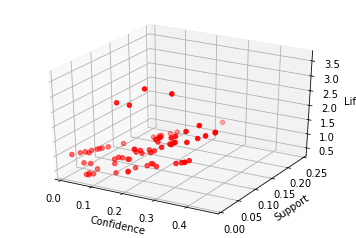

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = result_df['Confidence']
y = result_df['Support']
z = result_df['Lift']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Confidence')
ax.set_ylabel('Support')
ax.set_zlabel('Lift')

plt.show()